
# <font color=#ff5a5f size=7 face="Bello" bold = True>Airbnb- Just For You</font>

Toggle Code

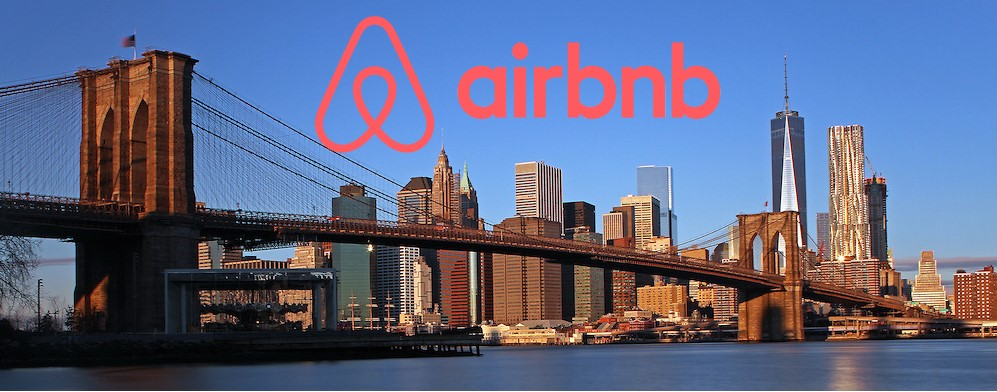

In [5]:
from IPython.display import display_html 
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

from IPython.display import Image
Image(filename="/Users/liuchangqian/Desktop/Presentation/2.jpg")

# <font color=#ff5a5f size=6 face="Bello" bold = True>Why Airbnb?</font>

<font color=#000000 size=4 face="Bello">First time visiting NYC? Do not know where to live? 
    
Go for Airbnb! Airbnb is one of the largest growing online B&B booking platform. 

We have used Airbnb.com for several years, and we aim to build personalized recommendation system based on in-depth look into Airbnb listing data and help you spend your vacation as a Real New Yorker!</font>

## <font color=#ff5a5f size=6 face="Bello" bold = True>Introduction of Dataset</font>

<font color=#000000 size=4 face="Bello">Data Source: Inside Airbnb

Description: Airbnb listings information in New York City (Up to 2018 Oct)


* listings (50,041 rows × 96 columns)


* reviews (1,051,974 rows × 6 columns)</font>

## <font color=#ff5a5f size=6 face="Bello" bold = True>Product Features</font>

<font color=#000000 size=4 face="Bello">
    
* A personalized recommendation system


* Analyze Airbnb listings from various and objective perspectives


* Dig out brand new features to solve consumers' pain point</font>

## <font color=#ff5a5f size=6 face="Bello" bold = True>How we process and build our database</font>

<font color=#000000 size=4 face="Bello">

* Remove unnecessary features(60+) in the original dataset.


* Remove rows with null values


* Convert zipcode into standard format (multi-types, eg int, str, float -> str)


* Collect new features:


| Features | Instruction |
| :--- | --- |
| The Closest Subway | The name of the Closest Subway|
| Distance to the Closest Subway |The amount of miles to the closest subway|
| The Closest Bus Station |The name of the Bus Station|
| Distance to the Closest Bus Station | The amount of miles to the closest Bus Station|
| Number of Restaurant | The amount of restaurants within 1500 meters of this Airbnb location|
| Review_Sores_Rating | The Official Rate of the Total Service on Airbnb Website.|
| Review_scores_accuracy | The Official Rate of the Accuracy on Airbnb Website.|
| Review_scores_cleanliness | The Official Rate of the Cleanliness on Airbnb Website.|
| Review_scores_communication | The Official Rate of the host Communication on Airbnb Website. |
| Review_scores_location | The Official Rate of the Location on Airbnb Website.|
| Review_scores_value | The Official Rate of the Value on Airbnb Website.|

* Merge new features into the mega dataset


* Score scaling for generating the final score of each listing
</font>

## <font color=#ff5a5f size=6 face="Bello" bold = True>Insight from the dataset</font>

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('database_1.csv')

C:\Users\Baoyp\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


C:\Users\Baoyp\Anaconda3\envs\py36\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
C:\Users\Baoyp\Anaconda3\envs\py36\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


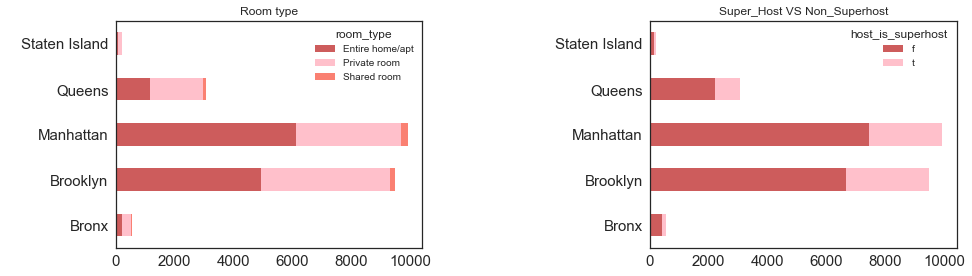

In [169]:
fig1, axes = plt.subplots(1,2,figsize=(15,4))
roomtype_borough = df.groupby(['neighbourhood_group','room_type'])
roomtype_borough.size().unstack().plot(kind='barh',stacked=True,colors=['IndianRed','pink','Salmon'],title='Room type',fontsize=15,ax=axes[0])
axes[0].set_ylabel(' ')
superhost_borough = df.groupby(['neighbourhood_group','host_is_superhost'])
sns.set(style='white')
superhost_borough.size().unstack().plot(kind='barh',stacked=True,colors=['IndianRed','pink','PaleVioletRed','Plum','Thistle'],title='Super_Host VS Non_Superhost',fontsize=15,ax=axes[1])
axes[1].set_ylabel(' ')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=150)
plt.tight_layout()

## <font color=#ff5a5f size=5 face="Bello" bold = True>Insight: Best Borough with Most Super Hosts!</font>

C:\Users\Baoyp\Anaconda3\envs\py36\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


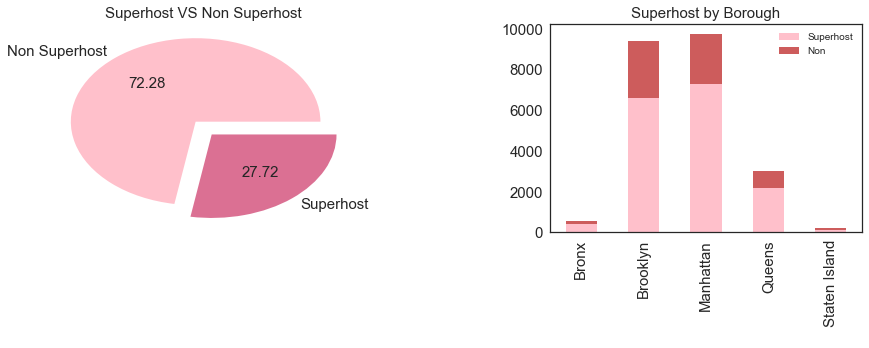

In [56]:
fig1, axes = plt.subplots(1,2,figsize=(14,5))
superhost_borough = df.groupby(['neighbourhood_group','host_is_superhost'])
sns.set(style='white')
superhost_borough.size().unstack().plot(kind='bar',stacked=True,colors=['pink','IndianRed','PaleVioletRed','Plum','Thistle'],
                                        fontsize=15,ax=axes[1])
superhost_group = df.groupby('host_is_superhost')
superhost_group.size().plot(kind='pie',labels=['Non Superhost', 'Superhost'],colors=['pink','PaleVioletRed','Plum','Thistle'], autopct='%.2f',
                            fontsize=15,explode=(0.1,0.1),ax=axes[0])
axes[0].set_title('Superhost VS Non Superhost',fontsize=15)
axes[1].legend(['Superhost','Non'],loc='best')
axes[1].set_title('Superhost by Borough',fontsize=15)
axes[0].axis('off')
axes[1].set_xlabel(' ')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=150)
plt.tight_layout()

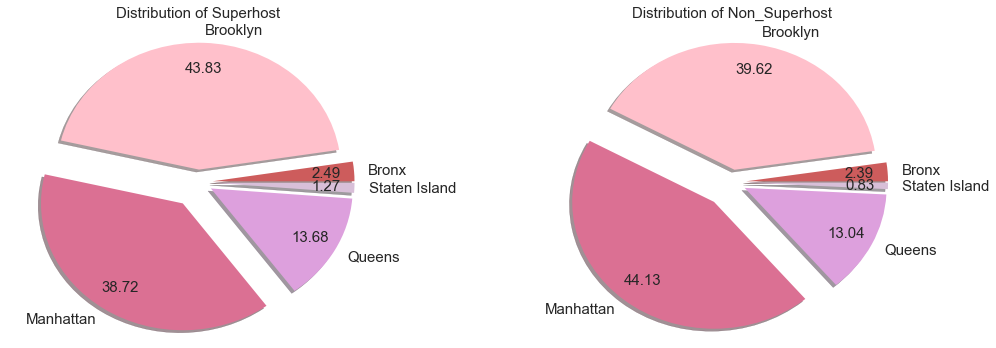

In [134]:
fig1, axes = plt.subplots(1,2,figsize=(15,5))

superhost_pie1 = df.loc[df['host_is_superhost']=='t'].groupby('neighbourhood_group')
superhost_pie1.size().plot(kind='pie',colors=['IndianRed','pink','PaleVioletRed','Plum','Thistle'], autopct='%.2f', fontsize=15,
                                                    shadow=True,explode=(0.1,0.1,0.2,0.1,0.1),pctdistance=0.8,ax=axes[0])
axes[0].set_title('Distribution of Superhost',fontsize=15)
#plt.title('Distribution of Superhost',fontsize = 18)
axes[0].axis('off')
superhost_pie2 = df.loc[df['host_is_superhost']=='f'].groupby('neighbourhood_group')
superhost_pie2.size().plot(kind='pie',colors=['IndianRed','pink','PaleVioletRed','Plum','Thistle'], autopct='%.2f', fontsize=15,
                        shadow=True,explode=(0.1,0.1,0.2,0.1,0.1),pctdistance=0.8,ax=axes[1])
axes[1].set_title('Distribution of Non_Superhost',fontsize=15)
axes[1].axis('off')
sns.set(style='white')
#plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=50)
plt.tight_layout()

## <font color=#ff5a5f size=5 face="Bello" bold = True>Top 10 Neighbourhoods with Most Superhost</font>

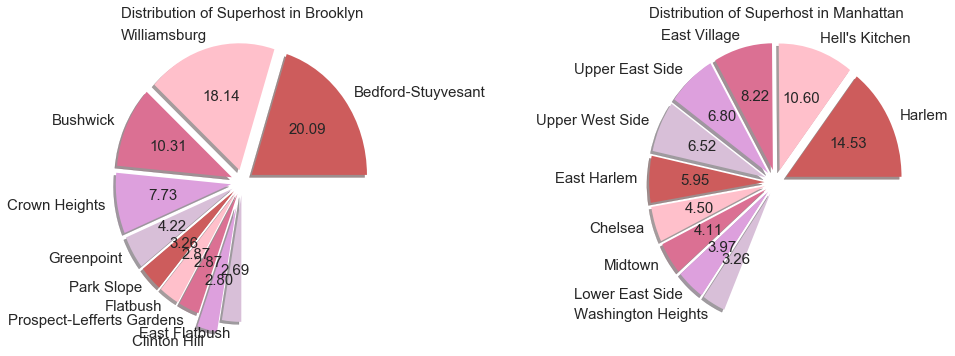

In [135]:
fig1, axes = plt.subplots(1,2,figsize=(15,5))
superhost_pie3 = df.loc[(df['host_is_superhost']=='t') & (df['neighbourhood_group']=='Brooklyn')].groupby('neighbourhood').size()
superhost_pie3.columns = ['suer_brook_neighbourhood', 'size']
top10_superhost_pie3=superhost_pie3.sort_values(ascending=False)[0:10]/superhost_pie3.sort_values(ascending=False).sum()
top10_superhost_pie3.plot(kind='pie', autopct='%.2f', fontsize=15, ax=axes[0],
                          colors=['IndianRed','pink','PaleVioletRed','Plum','Thistle'], 
                          shadow=True,explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1))
axes[0].set_title('Distribution of Superhost in Brooklyn',fontsize=15)
axes[1].set_title('Distribution of Superhost in Manhattan',fontsize=15)
superhost_pie4 = df.loc[(df['host_is_superhost']=='t') & (df['neighbourhood_group']=='Manhattan')].groupby('neighbourhood').size()
superhost_pie4.columns = ['suer_mat_neighbourhood', 'size']
top10_superhost_pie4=superhost_pie4.sort_values(ascending=False)[0:10]/superhost_pie3.sort_values(ascending=False).sum()
top10_superhost_pie4.plot(kind='pie', autopct='%.2f', fontsize=15, ax=axes[1],
                          colors=['IndianRed','pink','PaleVioletRed','Plum','Thistle'], 
                          shadow=True,explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
sns.set(style='white')
axes[0].axis('off')
axes[1].axis('off')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=50)
plt.tight_layout()

## <font color=#ff5a5f size=5 face="Bello" bold = True>Top 10 Neighbourhoods with Most Reviews</font>

In [17]:
df = pd.read_csv('database_3.csv')

C:\Users\Baoyp\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
#Top 10 districts having the highese average number of comments per listings
review_district = df[['review_num','neighbourhood']].groupby('neighbourhood')
review_district = review_district.mean()
review_district.columns = ['review number']
top20_review = review_district.sort_values("review number",ascending = False).iloc[0:19]

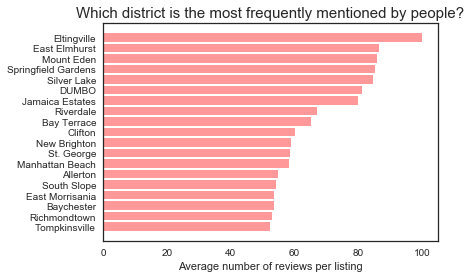

In [19]:
top20_review = top20_review.sort_values('review number',ascending = True)
districts = tuple(list(top20_review.index))
y_pos = np.arange(len(districts))
review_num = np.array(list(top20_review['review number']))
plt.barh(y_pos, review_num, align='center', fc="red",alpha=0.4)
plt.yticks(y_pos,districts)
plt.xlabel('Average number of reviews per listing')
plt.title('Which district is the most frequently mentioned by people?',fontsize=15)
plt.savefig("barh.eps",format="eps")
sns.set(style='white')

## <font color=#ff5a5f size=5 face="Bello" bold = True>Heatmap- Distribution of listings</font>

In [20]:
# Find the struture of scores given by Airbnb official site
def GroupBaseOnScore(x):
    if x == 100:
        return 'scores: 100'
    elif x >=90:
        return 'scores: 90~99'
    elif x >=80:
        return 'scores: 80~89'
    elif x >=70:
        return 'scores: 70~79'
    else:
        return 'scores: < 70'

In [28]:
merge_result = pd.concat([empt,sizes],join='outer',axis = 1, join_axes=[empt.index])
merge_result = merge_result.fillna(0)
merge_result = merge_result.drop(['zeros'],axis=1)
merge_result = merge_result.reset_index()
merge_result.columns = ['zipcode','size']
sizes = merge_result
sizes.reset_index(level = 0, inplace = True)
sizes['Zip'] = sizes['zipcode']

In [29]:
import folium
#Center the map at Times Square
m = folium.Map(location = [40.7589,-73.9851],zoom_start=12)

m.choropleth(geo_data='Class 6 - Zipcode.geojson',
             data= sizes,
             columns=[ 'Zip','size'],
             key_on='feature.properties.postalCode',
             fill_color='BuPu',
             fill_opacity=0.8, 
             line_opacity=0.2,
             legend_name='Distribution of listings',
            threshold_scale=[0,100,200,500,900,1100]
            )
folium.LayerControl().add_to(m)

In [30]:
m

## <font color=#ff5a5f size=5 face="Bello" bold = True>Price Heatmap</font>

In [31]:
df_new = df[['price','zipcode']]
average_price =df_new.groupby(['zipcode']).mean()
average_price.columns = ['average price']
merge_result2 = pd.concat([empt,average_price],join='outer',axis = 1, join_axes=[empt.index])
merge_result2 = merge_result2.fillna(0)
merge_result2 = merge_result2.drop(['zeros'],axis=1)
average_price = merge_result2
average_price.reset_index(level = 0, inplace = True)
average_price['Zip'] = average_price['zipcode']

import folium
#Center the map at Times Square
m2 = folium.Map(location = [40.7589,-73.9851],zoom_start=12)

m2.choropleth(geo_data='Class 6 - Zipcode.geojson',
             data= average_price,
             columns=[ 'Zip','average price'],
             key_on='feature.properties.postalCode',
             fill_color='YlOrRd',
             fill_opacity=0.8, 
             line_opacity=0.2,
             legend_name='Distribution of prices of listings',
            threshold_scale=[0,50,100,150,200,250]
            )
folium.LayerControl().add_to(m2)

m2

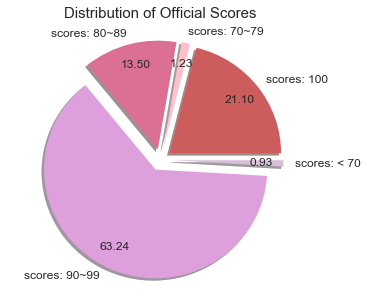

In [57]:
grouped.plot(kind='pie',colors=['IndianRed','pink','PaleVioletRed','Plum','Thistle'], autopct='%.2f', fontsize=12, figsize=(5,5),
                          shadow=True,explode=(0.1,0.1,0.1,0.1,0.1),pctdistance=0.8)
plt.axis('off')
plt.title('Distribution of Official Scores',fontsize=15)
sns.set(style='white')

## <font color=#ff5a5f size=6 face="Bello" bold = True>Should we trust it?</font>

## <font color=#ff5a5f size=6 face="Bello" bold = True>How we Build Our Evaluation Model ?</font>

<font color=#000000 size=4 face="Bello">❓ Do the listing rental literately match their description?


❓ Shall we think twice before trusting a review?</font>
 

 
<font color=#000000 size=3 face="Bello">Based on weights given by users, calculate the weighted average score using scaled rating of key 
    features and sort the listing result according to users' personal preference.</font>

<font color=#000000 size=3 face="Bello">\begin{equation*}
    Score = \sum Weights * Rating\,of\,Key\,Features
\end{equation*}</font>
 
<font color=#000000 size=4 face="Bello">Key Features:</font>

<font color=#000000 size=4 face="Bello"></font>
 
<font color=#000000 size=3 face="Bello">

* 🚩 Customer Experience

    Text mining results based on four languages (English, Español) in ten emotional dimensions (Fear, Trust, Negative, Positive, Joy, Disgust, Anticipation, Anger, Sadness, Surprise)


  \begin{equation*}Customer\,Experience = 10*Joy + 10*Trust + 10*Surprise + 5*Anticipation + 5*Positive - 10*Fear -10*Disgust -10*Anger -5 *Negative -5*Sadness\end{equation*}



* 🍽️ Catering Accessibility

    Using Google API number of restaurants near a certain listing rental


* 🚇 Subway Accessibility

    MTA Open Data to calculate the distance between closest subway station and a certain listing rental


* 🚌 Bus Accessibility

    Using MTA Open Data to calculate the distance between closest bus stop station and a certain listing rental
    

* 💧 Cleanliness

    Web scarping and updating the cleanliness score value in the original data set


* 💌 Host Evaluation

    Evaluate the review of the host combing the review scores regarding the communication and check-in process
    
    \begin{equation*}
    Host\,Evaluation = (review\,scores\,communication + review\,scores\,checkin)\,/\,2
    \end{equation*}
</font>

<font color=#ff5a5f size=6 face="Bello" bold = True>Now let's try it out!</font>

<img src='https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/240/apple/155/clapping-hands-sign_1f44f.png'>